In [ ]:
# # Parallelization - run on hpc05
# from hpc05 import Client
# rc = Client()
# lview = rc.load_balanced_view()
# dview = rc[:]

In [ ]:
# len(rc)

In [7]:
# Parallelization
import ipyparallel
rc = ipyparallel.Client(profile='python3')  # interface for activated engines (threads)
lview = rc.load_balanced_view()  # Use LoadBalancedView - automatic distribution of work to engines
dview = rc[:]  # DirectView to execute commands on all engines

In [8]:
len(rc)

24

In [9]:
%%px --local
# Run on all engines - THIS MACHINE
import sys, os
sys.path.append(os.path.expanduser('~/tsc_multivalley/Code/11_band_TB/'))

In [10]:
%%px --local
import numpy as np
import itertools as it

from types import SimpleNamespace
from scipy.optimize import minimize

import Modules.pauli as pauli
import Modules.Ham_MX2_11_band as H
import Modules.TB_parameters as TB
import Modules.functions as func

In [11]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [ ]:
%%px --local
def winding_ky(ky, kxs, p, U, phase=1.0):
    """Compute the winding number as a function of ky. """
    ks = [(kx, ky) for kx in kxs]
    return func.winding_number(ks, p, U, phase=phase)

In [ ]:
%%px --local
# Chiral operator
C = H.C
# Unitary that block off-diagonalizes the Hamiltonian
U = np.linalg.eigh(C)[1]
# Half a period along x in the Brillouin zone
kxs = np.linspace(0, 2*np.pi, 10000)

# SOI strengths, superconducting pairing
# All in eV
p = SimpleNamespace(mu=1.83, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0)
# sqrt = 0.07
# Ex = np.sqrt(sqrt**2 + p.Delta**2)
# p.Ex = Ex
# p.mu = 1.761

sqrt = 0.005
Ex = np.sqrt(sqrt**2 + p.Delta**2)
p.Ex = Ex
p.mu = 1.83

In [ ]:
# H.energies(TB.Kp[0], TB.Kp[1], p, SC=False, spin=False)

In [ ]:
# Conduction band minimum is at 1.773 eV (without spin, without SOI)

In [ ]:
kys = np.linspace(0, 0.1, 500)*4*np.pi/np.sqrt(3)

In [ ]:
data = lview.map_async(lambda ky: winding_ky(ky, kxs, p, U), kys)
data.wait_interactive()

In [ ]:
cut = data.get()

In [ ]:
plt.plot(cut)
# plt.xlim(200, 220)

In [ ]:
ky = 0

In [ ]:
kxs = np.linspace(0, 2*np.pi, 20000)
p = SimpleNamespace(mu=1.831, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0)
p.Ex = p.Delta + 0.01
# Chiral operator
C = H.C

# Unitary that block off-diagonalizes the Hamiltonian
U = np.linalg.eigh(C)[1]

In [ ]:
zs = [func.z(kx, ky, U, p) for kx in kxs]

In [ ]:
zs = np.array(zs)

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.plot(zs.real, zs.imag)

In [ ]:
angles = np.angle(zs)

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.plot(angles)

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.plot(angles)
plt.xlim(11750, 12500)

In [ ]:
kxs = np.linspace(0, 2*np.pi, 5000)
p = SimpleNamespace(mu=1.831, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0)
p.Ex = p.Delta + 0.01
# Chiral operator
C = H.C

# Unitary that block off-diagonalizes the Hamiltonian
U = np.linalg.eigh(C)[1]

In [ ]:
def k_BZ_edges(mm, nn):
    """Lattice vector indices in the 11 band basis, T = mm*a_1 + nn*a_2. """
    # In Doru's basis
    m = mm - nn
    n = nn
    return 2*np.pi/np.sqrt(3.) * np.sqrt(m**2 + n**2 + m*n), np.pi/np.sqrt(m**2 + n**2 + m*n)

def tokxky(ks, mm, nn):
    kperp, kpar = ks
    # In Doru's basis
    m = mm - nn
    n = nn
    v = (m + n/2.)/np.sqrt(m**2 + n**2 + m*n)
    w = 0.5*n*np.sqrt(3.)/np.sqrt(m**2 + n**2 + m*n)
    return (v*kpar + w*kperp, w*kpar - v*kperp)

In [ ]:
# SOI strengths, superconducting pairing
# All in eV
p = SimpleNamespace(mu=1.83, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0, mm=0, nn=0)
p.Ex = 0.00215
# Chiral operator
C = H.C
# Unitary that block off-diagonalizes the Hamiltonian
U = np.linalg.eigh(C)[1]

phase = 1.0  # Shift the curve in the complex plane by an overall phase factor

# Approximate armchair cut
mm = 8; nn = 15
p.mm = mm; p.nn = nn

kperp_edge, kpar_edge = k_BZ_edges(mm, nn)

# kperps = np.linspace(0, 2*kperp_edge, 15000)
kperps = np.linspace(0, kperp_edge, 15000)
kpar = 0.0

ks = [tokxky((kperp, kpar), mm, nn) for kperp in kperps]

In [ ]:
zs2 = [func.z(kx, ky, U, p) for (kx, ky) in ks]

In [ ]:
zs2 = np.array(zs2)
angles2 = np.angle(zs2)

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.plot(angles)
plt.plot(angles2)
# plt.xlim(17000, 17200)

In [ ]:
l = [1, 2, 3]

In [ ]:
l[:-1]

In [ ]:
func.branch_cuts(angles)

In [ ]:
func.branch_cuts(angles2)

## Line cuts over $\mu$ at a fixed $E_x$ for different edge cuts

Vary the discretization of the Brillouin zone to check convergence. Check the $m=8$, $n = 15$ cut

In [ ]:
%%px --local
def winding_number_mu(mu, ks, p, U, phase=1.0):
    """Compute the winding number as a function of mu."""
    p.mu = mu
    return func.winding_number(ks, p, U, phase=phase)

def k_BZ_edges(mm, nn):
    """Lattice vector indices in the 11 band basis, T = mm*a_1 + nn*a_2. """
    # In Doru's basis
    m = mm - nn
    n = nn
    return 2*np.pi/np.sqrt(3.) * np.sqrt(m**2 + n**2 + m*n), np.pi/np.sqrt(m**2 + n**2 + m*n)

def tokxky(ks, mm, nn):
    kperp, kpar = ks
    # In Doru's basis
    m = mm - nn
    n = nn
    v = (m + n/2.)/np.sqrt(m**2 + n**2 + m*n)
    w = 0.5*n*np.sqrt(3.)/np.sqrt(m**2 + n**2 + m*n)
    return (v*kpar + w*kperp, w*kpar - v*kperp)

In [ ]:
%%px --local
# SOI strengths, superconducting pairing
# All in eV
sqrt = 0.002
p = SimpleNamespace(mu=1.77, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0, mm=0, nn=0)
Ex = np.sqrt(sqrt**2 + p.Delta**2)
p.Ex = Ex

# Chiral operator
C = H.C

# Unitary that block off-diagonalizes the Hamiltonian
U = np.linalg.eigh(C)[1]

phase = 1.0  # Shift the curve in the complex plane by an overall phase factor

# Approximate armchair cut in my basis
mm = 9; nn = 17
p.mm = mm; p.nn = nn

kperp_edge, kpar_edge = k_BZ_edges(mm, nn)

kperps = np.linspace(-kperp_edge, kperp_edge, 18000)
kpar = 0.0

ks = [tokxky((kperp, kpar), mm, nn) for kperp in kperps]

In [ ]:
mus = np.linspace(1.825, 1.845, 150)
number_points = [10000, 20000, 30000, 40000, 50000, 70000, 100000, 150000, 200000, 300000, 500000]
kpar = 0.0

In [ ]:
d = {}
keys = []
for n in number_points:
    key = str(n)
    keys.append(key)
    kperps = np.linspace(0, kperp_edge, n)
    ks = [tokxky((kperp, kpar), mm, nn) for kperp in kperps]
    dview['ks'] = ks
    data = lview.map_async(lambda mu: winding_number_mu(mu, ks, p, U), mus)
    data.wait_interactive()
    d[key] = (data.get(), kperps, kpar)

In [ ]:
import os
import pickle
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'

out_name = 'winding_line_cut_convergence_m9n17_half_BZ'
# Write everything to a pickle file
with open(path + out_name + '.p', 'wb') as fp:
    pickle.dump(d, fp)
    pickle.dump(mus, fp)
    pickle.dump(kpar, fp)
    pickle.dump(p, fp)

## Line cuts over $\mu$ at a fixed $E_x$ for different edge cuts

Vary the angle, take cuts that are close to the armchair edge. Armchair edge is $(1, 2)$, or for a large unit cell $(m, 2m)$. Take cuts $(m, 2m-1)$

In [ ]:
%%px --local
def winding_number_mu(mu, N, kpar, p, U, phase=1.0, half_BZ=True, adaptive=True, eps=0.5e-2):
    """Compute the winding number as a function of mu."""
    p.mu = mu
    return func.new_winding_number(N, kpar, p, U, phase=1.0, half_BZ=half_BZ, adaptive=adaptive, eps=eps)[0]

In [ ]:
mns = [(1, 2)] + [(m, 2*m-1) for m in range(2, 18)]  # Indices for edge cuts

In [ ]:
angles = [func.angle_armchair(m, n) for (m, n) in mns]

In [ ]:
angles

In [ ]:
BZ_edges = [func.k_BZ_edges(m, n) for (m, n) in mns]

In [ ]:
BZ_edges

In [ ]:
%%px --local
# SOI strengths, superconducting pairing
# All in eV
p = SimpleNamespace(mu=1.77, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0, mm=0, nn=0)
sqrt = 0.0032
Ex = np.sqrt(sqrt**2 + p.Delta**2)
p.Ex = Ex

# Approximate armchair cut in my basis
# mm = 9; nn = 17
# p.mm = mm; p.nn = nn

# Chiral operator
C = H.C
# Unitary that block off-diagonalizes the Hamiltonian
U = np.linalg.eigh(C)[1]
phase = 1.0  # Shift the curve in the complex plane by an overall phase factor

N = 20000
kpar = 0.0

half_BZ=True
adaptive=True
eps=1e-2

In [ ]:
mus = np.linspace(1.82, 1.88, 500)

In [ ]:
d = {}
keys = []
for (mm, nn) in mns:
    key = (mm, nn)
    keys.append(key)
    p.mm = mm; p.nn = nn
    dview['p.mm'] = mm; dview['p.nn'] = nn
    data = lview.map_async(lambda mu: winding_number_mu(mu, N, kpar, p, U, half_BZ=half_BZ,
                                                        adaptive=adaptive, eps=eps),
                           mus)
    data.wait_interactive()
    d[key] = data.get()

In [ ]:
import os
import pickle
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'

out_name = 'winding_line_cut_mus_sqrt00032_edges_angles_half_BZ_adaptive'
# Write everything to a pickle file
with open(path + out_name + '.p', 'wb') as fp:
    pickle.dump(d, fp)
    pickle.dump(mus, fp)
    pickle.dump(keys, fp)
    pickle.dump(p, fp)
    pickle.dump(N, fp)
    pickle.dump(eps, fp)
    pickle.dump(kpar, fp)
    pickle.dump(half_BZ, fp)
    pickle.dump(adaptive, fp)
    pickle.dump(phase, fp)

## Line cuts over $\mu$ at a fixed $E_x$ for different $k_\parallel$

Take (8, 15), for which there are crossings for two minima. Need to integrate over the entire BZ here!

In [ ]:
%%px --local
# SOI strengths, superconducting pairing
# All in eV
p = SimpleNamespace(mu=1.77, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0, mm=0, nn=0)
sqrt = 0.0032
Ex = np.sqrt(sqrt**2 + p.Delta**2)
p.Ex = Ex

# Approximate armchair cut in my basis
mm = 8; nn = 15
p.mm = mm; p.nn = nn

# Chiral operator
C = H.C
# Unitary that block off-diagonalizes the Hamiltonian
U = np.linalg.eigh(C)[1]
phase = 1.0  # Shift the curve in the complex plane by an overall phase factor

N = 10000
kpar = 0.0

half_BZ=False
adaptive=True
eps=1e-2

In [ ]:
kperp_edge = func.k_BZ_edges(p.mm, p.nn)[1]  # Extent of BZ for k_perp
print(kperp_edge)

kpars = np.linspace(-kperp_edge, kperp_edge, 21)

In [ ]:
mus = np.linspace(1.82, 1.86, 400)

In [ ]:
d = {}
keys = []
for kpar in kpars:
    key = np.round(kpar, 4)
    keys.append(key)
    dview['kpar'] = kpar
    data = lview.map_async(lambda mu: winding_number_mu(mu, N, kpar, p, U, half_BZ=half_BZ,
                                                        adaptive=adaptive, eps=eps),
                           mus)
    data.wait_interactive()
    d[key] = data.get()

In [ ]:
import os
import pickle
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'

out_name = 'winding_line_cut_mus_sqrt00032_m8n15_kpars_adaptive'
# Write everything to a pickle file
with open(path + out_name + '.p', 'wb') as fp:
    pickle.dump(d, fp)
    pickle.dump(mus, fp)
    pickle.dump(keys, fp)
    pickle.dump(kpars, fp)
    pickle.dump(p, fp)
    pickle.dump(N, fp)
    pickle.dump(eps, fp)
    pickle.dump(kpar, fp)
    pickle.dump(half_BZ, fp)
    pickle.dump(adaptive, fp)
    pickle.dump(phase, fp)

In [ ]:
for key in keys:
    plt.figure()
    plt.plot(mus, d[key])
    plt.title(key)

## Line cuts over $k_\parallel$

Check the periodicity of the winding number. Need to integrate over the entire BZ here!

In [ ]:
%%px --local
def winding_number_kpar(kpar, N, p, U, phase=1.0, half_BZ=True, adaptive=True, eps=0.5e-2):
    """Compute the winding number as a function of mu."""
    return func.new_winding_number(N, kpar, p, U, phase=1.0, half_BZ=half_BZ, adaptive=adaptive, eps=eps)[0]

In [ ]:
%%px --local
# SOI strengths, superconducting pairing
# All in eV
p = SimpleNamespace(mu=1.839, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0, mm=0, nn=0)
sqrt = 0.003
Ex = np.sqrt(sqrt**2 + p.Delta**2)
p.Ex = Ex

# Approximate armchair cut in my basis
mm = 14; nn = 27
p.mm = mm; p.nn = nn

# Chiral operator
C = H.C
# Unitary that block off-diagonalizes the Hamiltonian
U = np.linalg.eigh(C)[1]
phase = 1.0  # Shift the curve in the complex plane by an overall phase factor

N = 15000
kpar = 0.0

half_BZ=False
adaptive=True
eps=1e-2

In [ ]:
kpar_edge = func.k_BZ_edges(p.mm, p.nn)[1]  # Extent of BZ for k_par
print(kpar_edge)

kpars = np.linspace(-4*kpar_edge, 4*kpar_edge, 1500)

In [ ]:
cut = lview.map_async(lambda kpar: winding_number_kpar(kpar, N, p, U, half_BZ=half_BZ,
                                                        adaptive=adaptive, eps=eps),
                           kpars)
cut.wait_interactive()
data = cut.get()

In [ ]:
import os
import pickle
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'

out_name = 'winding_line_cut_mu1839_sqrt0003_m14n27_kpars_adaptive_check_period'
# Write everything to a pickle file
with open(path + out_name + '.p', 'wb') as fp:
    pickle.dump(data, fp)
    pickle.dump(kpars, fp)
    pickle.dump(p, fp)
    pickle.dump(N, fp)
    pickle.dump(eps, fp)
    pickle.dump(half_BZ, fp)
    pickle.dump(adaptive, fp)
    pickle.dump(phase, fp)

## Compute winding number line cuts over $k_\parallel$ for an armchair edge

In [12]:
%%px --local
def winding_number_kpar(kpar, N, p, U, phase=1.0, half_BZ=True, adaptive=True, eps=0.5e-2):
    """Compute the winding number as a function of mu."""
    return func.new_winding_number(N, kpar, p, U, phase=1.0, half_BZ=half_BZ, adaptive=adaptive, eps=eps)[0]

In [13]:
%%px --local
# SOI strengths, superconducting pairing
# All in eV
p = SimpleNamespace(mu=1.83, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0, mm=0, nn=0)

# Edge cut
mm = 1; nn = 2
p.mm = mm; p.nn = nn

# Chiral operator
C = H.C
# Unitary that block off-diagonalizes the Hamiltonian
U = np.linalg.eigh(C)[1]
phase = 1.0  # Shift the curve in the complex plane by an overall phase factor

N = 3000
kpar = 0.0

half_BZ=True
adaptive=True
eps=1e-2

In [14]:
func.k_BZ_edges(p.mm, p.nn)[0]  # k_perp edges

6.2831853071795862

In [15]:
kpar_edge = func.k_BZ_edges(p.mm, p.nn)[1]  # Extent of BZ for k_par
print(kpar_edge*0.4)

kpars = np.linspace(-kpar_edge*0.4, 0.4*kpar_edge, 500)

0.725519745694


In [16]:
sqrts = [2e-3, 3e-3, 4e-3, 5e-3, 6e-3]
keys = [str(sqrt) for sqrt in sqrts]
keys

['0.002', '0.003', '0.004', '0.005', '0.006']

In [17]:
d_dict = {}
for sqrt, key in zip(sqrts, keys):
    Ex = np.sqrt(sqrt**2 + p.Delta**2)
    p.Ex = Ex; dview['p.Ex'] = Ex
    cut = lview.map_async(lambda kpar: winding_number_kpar(kpar, N, p, U, half_BZ=half_BZ,
                                                            adaptive=adaptive, eps=eps),
                               kpars)
    cut.wait_interactive()
    d_dict[key] = cut.get()

 500/500 tasks finished after  745 s
done


In [18]:
import os
import pickle
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'

out_name = 'winding_cuts_mu183_sqrts_armchair_kpars_adaptive'
# Write everything to a pickle file
with open(path + out_name + '.p', 'wb') as fp:
    pickle.dump(d_dict, fp)
    pickle.dump(kpars, fp)
    pickle.dump(p, fp)
    pickle.dump(N, fp)
    pickle.dump(eps, fp)
    pickle.dump(half_BZ, fp)
    pickle.dump(adaptive, fp)
    pickle.dump(phase, fp)

In [21]:
keys

['0.002', '0.003', '0.004', '0.005', '0.006']

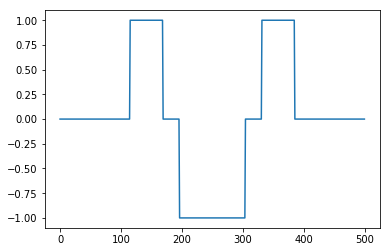

In [33]:
plt.plot(d_dict[keys[2]])